* Variable: Description

- ID: Unique Identifier of a row
- Age: Age of the customer
- Gender: Gender of the customer (Male and Female)
- Income: Yearly income of the customer
- Balance: Average quarterly balance of the customer
- Vintage: No. of years the customer is associated with bank
- Transaction_Status: Whether the customer has done any transaction in the past 3 months or not
- Product_Holdings: No. of product holdings with the bank
- Credit_Card: Whether the customer has a credit card or not
- Credit_Category: Category of a customer based on the credit score
- Is_Churn: Whether the customer will churn in next 6 months or not

is_churn_yes --> 1
is_churn_no --> 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_PDjVQMB.csv")

In [3]:
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


### Correlation Matrix

<AxesSubplot:>

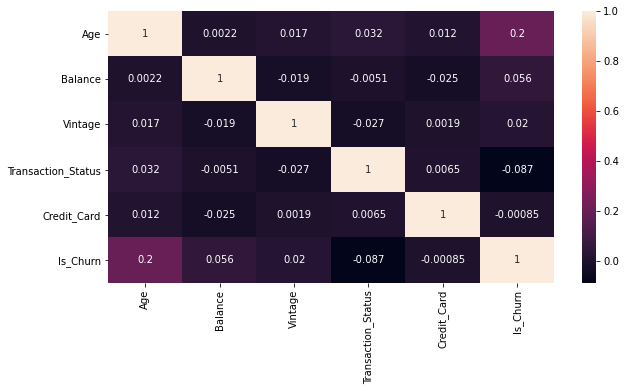

In [4]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

- Observation
- Age and Balance are showing the positive correlation with the target column, we will further investigate these two variables clearly
- variables are not showing much correlation with each other also

In [5]:
#let's check the shape of the dataset
df.shape

(6650, 11)

In [6]:
#getting the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [7]:
#checking for any null values
df.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

- there is no missing values in our dataset.

In [8]:
#this variable is used to append the selected variable for model building
final_feature = []

In [9]:
min(df['Age'])

21

In [10]:
max(df['Age'])

72

### grouping the ages within the range of 10 as we have big range of age

In [11]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 10) for i in range(21, 72, 10)]
print(labels)

#cut function create group or segment the data on bins
df['Age_group'] = pd.cut(df.Age, range(21, 90, 10), right=False, labels=labels)

['21 - 31', '31 - 41', '41 - 51', '51 - 61', '61 - 71', '71 - 81']


### Single Variate Analysis

### 1.Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

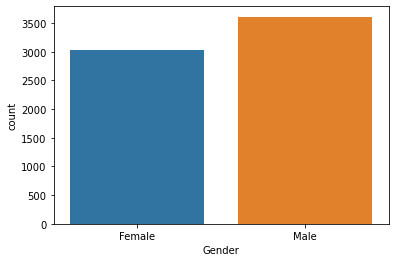

In [12]:
sns.countplot(x='Gender', data=df)

- female are less in number than male
- next let's see what is the churn rate according to gender

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

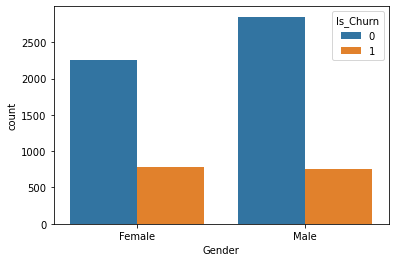

In [13]:
sns.countplot(df['Gender'],hue=df['Is_Churn'])

In [14]:
df[['Gender','Is_Churn']].groupby(['Gender']).mean()

,Is_Churn
Gender,
Female,0.25576
Male,0.21041


#### the average churn rate of male and female has 4% difference, females are more likely to churn than man

In [15]:
table = pd.pivot_table(df, values='Is_Churn', index = ['Gender'],columns=['Income'],aggfunc=np.mean)
table

Income,10L - 15L,5L - 10L,Less than 5L,More than 15L
Gender,,,,
Female,0.260023,0.251834,0.244696,0.267188
Male,0.214427,0.200194,0.209007,0.221277


In [16]:
table = pd.pivot_table(df, values='Is_Churn', index = ['Gender'],columns=['Vintage'],aggfunc=np.mean)
table

Vintage,0,1,2,3,4,5
Gender,,,,,,
Female,0.234339,0.257649,0.225166,0.287284,0.270968,0.232000
Male,0.190476,0.229195,0.193370,0.203125,0.226331,0.231183


In [17]:
table = pd.pivot_table(df, values='Is_Churn', index = ['Gender'],columns=['Transaction_Status'],aggfunc=np.mean)
table

Transaction_Status,0,1
Gender,,
Female,0.293486,0.219496
Male,0.247834,0.175970


In [18]:
table = pd.pivot_table(df, values='Is_Churn', index = ['Gender'],columns=['Product_Holdings'],aggfunc=np.mean)
table

Product_Holdings,1,2,3+
Gender,,,
Female,0.284615,0.227891,0.253623
Male,0.214124,0.208528,0.184615


In [19]:
table = pd.pivot_table(df, values='Is_Churn', index = ['Gender'],columns=['Credit_Card'],aggfunc=np.mean)
table

Credit_Card,0,1
Gender,,
Female,0.256944,0.255172
Male,0.210784,0.210218


In [20]:
table = pd.pivot_table(df, values='Is_Churn', index = ['Gender'],columns=['Credit_Category'],aggfunc=np.mean)
table

Credit_Category,Average,Good,Poor
Gender,,,
Female,0.248936,0.221902,0.277066
Male,0.214869,0.187575,0.218900


### with all these pivot_table we can surely say that female churn_rate is higher than man
- since it is showing significant difference we will keep this variable in our model

In [21]:
final_feature.append('Gender')

### 2.Income

<AxesSubplot:xlabel='Income', ylabel='count'>

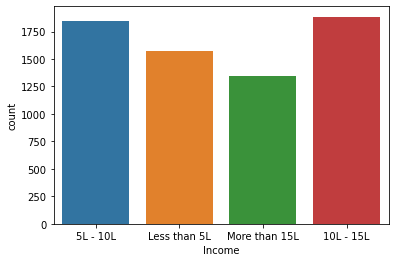

In [22]:
sns.countplot(x='Income', data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

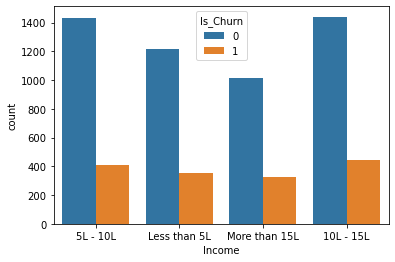

In [23]:
sns.countplot(x='Income', hue='Is_Churn', data=df)

In [24]:
table = pd.pivot_table(df, values='Is_Churn',index=['Income'], aggfunc=np.mean)
table

,Is_Churn
Income,
10L - 15L,0.235544
5L - 10L,0.223064
Less than 5L,0.225048
More than 15L,0.243123


- all type of income is not showing any significant difference for churn rate, we will compare it with another variable to see if we can get something new otherwise we will discard the variable

In [25]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn', 'Age_group'],
      dtype='object')

In [26]:
for i in ['Vintage','Transaction_Status', 'Product_Holdings', 'Credit_Card','Credit_Category','Age_group']:
    table = pd.pivot_table(df, values='Is_Churn', index=['Income'], columns=[i])
    print()
    print(table)


Vintage               0         1         2         3         4         5
Income                                                                   
10L - 15L      0.227799  0.255376  0.207254  0.206549  0.279570  0.242424
5L - 10L       0.195652  0.233422  0.217949  0.277202  0.173684  0.250000
Less than 5L   0.210084  0.237288  0.197368  0.235110  0.251773  0.184211
More than 15L  0.205240  0.243028  0.205645  0.247525  0.305344  0.250000

Transaction_Status         0         1
Income                                
10L - 15L           0.272830  0.202405
5L - 10L            0.263904  0.182796
Less than 5L        0.261598  0.189460
More than 15L       0.279687  0.209929

Product_Holdings         1         2        3+
Income                                        
10L - 15L         0.250821  0.219780  0.241935
5L - 10L          0.237714  0.209641  0.212500
Less than 5L      0.224093  0.230352  0.174603
More than 15L     0.275000  0.210280  0.253968

Credit_Card           0         1
In

#### we can clearly see that income is not the reason for customers to churn, hence we will not include this variable

### 4. Vintage

<AxesSubplot:xlabel='Vintage', ylabel='count'>

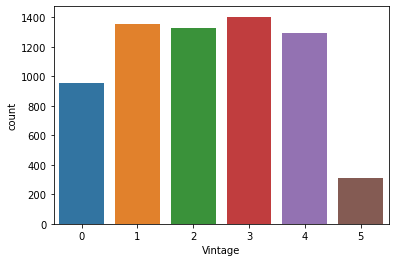

In [27]:
sns.countplot(x='Vintage', data=df)

<AxesSubplot:xlabel='Vintage', ylabel='count'>

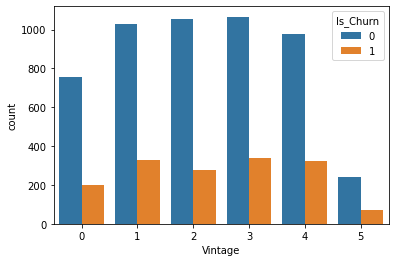

In [28]:
sns.countplot(x='Vintage', hue = 'Is_Churn', data=df)

In [29]:
table = pd.pivot_table(df, values = 'Is_Churn', index='Vintage')
table

,Is_Churn
Vintage,
0,0.210251
1,0.242245
2,0.207831
3,0.241281
4,0.247685
5,0.231511


### vintage is also no showing much difference in churn rate let's see it with other variables

In [30]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn', 'Age_group'],
      dtype='object')

In [31]:
for i in ['Transaction_Status', 'Product_Holdings', 'Credit_Card','Credit_Category','Age_group']:
    table = pd.pivot_table(df, values='Is_Churn', index=['Vintage'], columns=[i])
    print(table)

Transaction_Status         0         1
Vintage                               
0                   0.246014  0.179884
1                   0.268817  0.217639
2                   0.238095  0.180516
3                   0.284271  0.199438
4                   0.302937  0.192604
5                   0.250000  0.211921
Product_Holdings         1         2        3+
Vintage                                       
0                 0.231084  0.181818  0.296296
1                 0.253478  0.233025  0.220339
2                 0.206299  0.215531  0.145161
3                 0.260870  0.224818  0.207547
4                 0.275290  0.222571  0.236364
5                 0.238994  0.207143  0.416667
Credit_Card         0         1
Vintage                        
0            0.202614  0.213846
1            0.239915  0.243488
2            0.217978  0.202718
3            0.234440  0.244854
4            0.260970  0.241020
5            0.200000  0.245370
Credit_Category   Average      Good      Poor
Vintage   

### vintage and age group is related, i will keep this feature as no of years a customer associated with bank can be helpful

In [32]:
final_feature.append("Vintage")

### 5. Transaction Status

In [33]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn', 'Age_group'],
      dtype='object')

<AxesSubplot:xlabel='Transaction_Status', ylabel='count'>

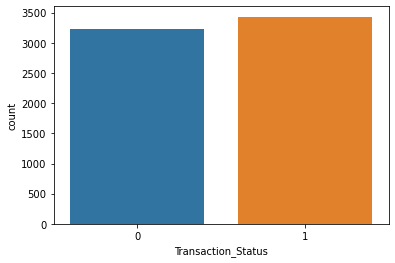

In [34]:
sns.countplot(data=df, x='Transaction_Status')

<AxesSubplot:xlabel='Transaction_Status', ylabel='count'>

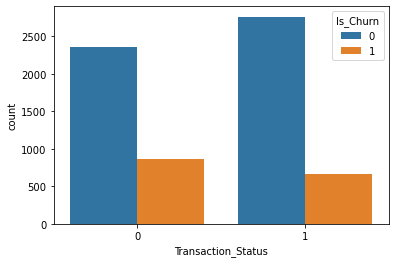

In [35]:
sns.countplot(data=df, x='Transaction_Status', hue='Is_Churn')

In [36]:
table = pd.pivot_table(df, values = 'Is_Churn', index = ['Transaction_Status'])
table

,Is_Churn
Transaction_Status,
0,0.268944
1,0.195627


### The customer who has not done any transaction in the past three are more likely to churn
- This is an important variable so we will keep it

In [37]:
final_feature.append('Transaction_Status')

### 6. Product Holdings

<AxesSubplot:xlabel='Product_Holdings', ylabel='count'>

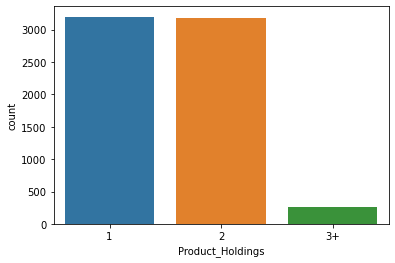

In [38]:
sns.countplot(data=df, x='Product_Holdings')

### Most of the customers has held 1 or 2 product with the bank

<AxesSubplot:xlabel='Product_Holdings', ylabel='count'>

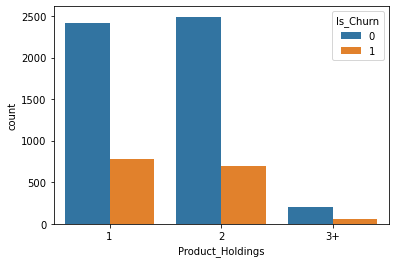

In [39]:
#Let's see relation with the churn
sns.countplot(data=df, x='Product_Holdings', hue='Is_Churn')

In [40]:
table = pd.pivot_table(df, values='Is_Churn', index =['Product_Holdings'], aggfunc=np.mean)
table

,Is_Churn
Product_Holdings,
1,0.245625
2,0.217473
3+,0.220149


### This is also not showing much difference

In [41]:
for i in ['Transaction_Status', 'Credit_Card','Credit_Category','Age_group']:
    table = pd.pivot_table(df, values='Is_Churn', index=['Product_Holdings'], columns=[i])
    print(table)

Transaction_Status         0         1
Product_Holdings                      
1                   0.293103  0.200122
2                   0.245221  0.192192
3+                  0.255474  0.183206
Credit_Card              0         1
Product_Holdings                    
1                 0.237965  0.249643
2                 0.221689  0.215421
3+                0.269663  0.195531
Credit_Category    Average      Good      Poor
Product_Holdings                              
1                 0.244376  0.193505  0.272421
2                 0.215967  0.206327  0.223951
3+                0.238636  0.276923  0.173913
Age_group          21 - 31   31 - 41   41 - 51   51 - 61   61 - 71   71 - 81
Product_Holdings                                                            
1                 0.106796  0.202758  0.266254  0.394619  0.425373  0.166667
2                 0.100703  0.179428  0.246471  0.319249  0.453704  0.714286
3+                0.026316  0.222222  0.246914  0.303030  0.500000       NaN


In [42]:
#this variable is showing some relating with other variables, so i would like to keep this vairable
final_feature.append('Product_Holdings')

### 7. Credit Card

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Card', ylabel='count'>

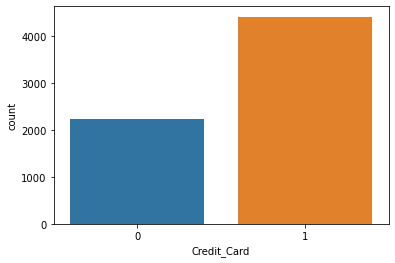

In [43]:
sns.countplot(df['Credit_Card'])

### more customers has credit card

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Card', ylabel='count'>

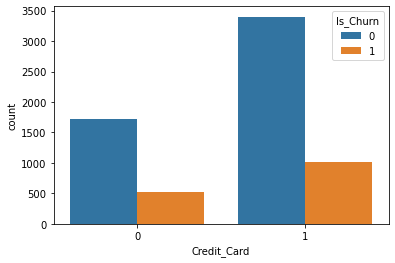

In [44]:
#let's see with target variable
sns.countplot(df['Credit_Card'], hue=df['Is_Churn'])

In [45]:
table=pd.pivot_table(df, values='Is_Churn', index=['Credit_Card'], aggfunc=np.mean)
table

,Is_Churn
Credit_Card,
0,0.231631
1,0.230874


### There is not much difference on churn rate

In [46]:
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn', 'Age_group'],
      dtype='object')

In [47]:
for i in df.columns:
    if i!='ID' and i!='Credit_Card' and i!='Balance' and i!='Is_Churn':
        print(i)
        table = pd.pivot_table(df, values='Is_Churn', index=['Credit_Card'], columns=[i],aggfunc=np.mean)
        print(table)

Age
Age           21        22        23        24        25        26        27  \
Credit_Card                                                                    
0            0.0  0.000000  0.000000  0.111111  0.100000  0.120000  0.100000   
1            0.0  0.222222  0.157895  0.166667  0.034483  0.026316  0.102273   

Age                28        29        30  ...        63        64        65  \
Credit_Card                                ...                                 
0            0.215686  0.083333  0.157895  ...  0.545455  0.333333  0.562500   
1            0.080808  0.075630  0.098361  ...  0.166667  0.500000  0.526316   

Age                66   67   68        69        70     71   72  
Credit_Card                                                      
0            0.625000  0.2  0.5  0.333333  1.000000  1.000  0.0  
1            0.454545  0.6  0.5  0.500000  0.666667  0.375  0.5  

[2 rows x 52 columns]
Gender
Gender         Female      Male
Credit_Card                 

In [48]:
df[['Credit_Card','Is_Churn']].groupby('Credit_Card').mean()

,Is_Churn
Credit_Card,
0,0.231631
1,0.230874


In [49]:
#Credit Card is not showing any much difference so i will exclude it

### 8. Credit Category

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Category', ylabel='count'>

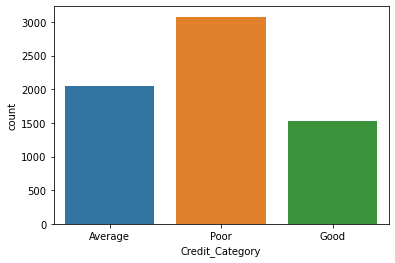

In [50]:
sns.countplot(df['Credit_Category'])

### more customers has bad credit score

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Category', ylabel='count'>

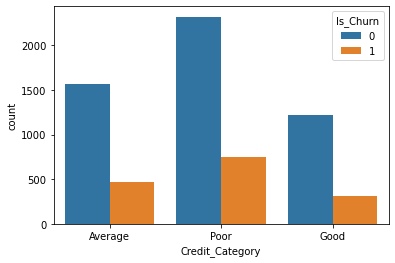

In [51]:
sns.countplot(df['Credit_Category'], hue=df['Is_Churn'])

### as expected customer churn rate is high with poor credit score

In [52]:
# we will keep this variable
final_feature.append('Credit_Category')

### Age_Group

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_group', ylabel='count'>

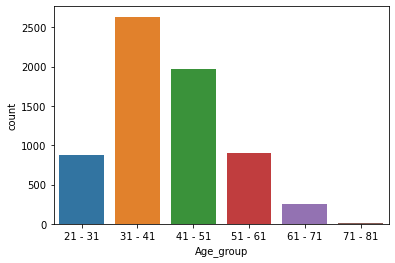

In [53]:
sns.countplot(df['Age_group'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_group', ylabel='count'>

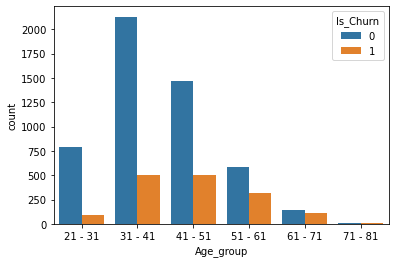

In [54]:
sns.countplot(df['Age_group'],hue=df['Is_Churn'])

In [55]:
table = pd.pivot_table(df, values='Is_Churn', index=['Age_group'], aggfunc=np.mean)
table

,Is_Churn
Age_group,
21 - 31,0.100342
31 - 41,0.192103
41 - 51,0.256215
51 - 61,0.355801
61 - 71,0.440000
71 - 81,0.461538


### Churn rate is increasing as Age_group is increasing

In [56]:
final_feature.append('Age_group')

### Continuous variable

### Balance

In [57]:
min(df['Balance'])

63.0

In [58]:
max(df['Balance'])

2436615.81

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

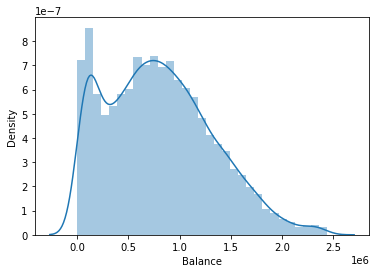

In [59]:
sns.distplot(df['Balance'])

### most of the customer has average quaterly balance 5lakh to 10lakh

In [60]:
df[['Balance','Income']].groupby('Income').mean()

,Balance
Income,
10L - 15L,823803.806531
5L - 10L,782171.957656
Less than 5L,784419.132473
More than 15L,832063.965926


- customers with less than 10L has average quarterly balance 7.8 lakh and income greater than 10L has quaeterly balance 8 lakh

In [61]:
#and income alone is not showing much info, so i will create a new col as 
#modified income category, where i will keep only two category as greater than 10L and less than 10L
df['Income_Modified']=df['Income'].replace({'Less than 5L':'Less than 10L','5L - 10L':'Less than 10L','10L - 15L':'Greater than 10L','More than 15L':'Greater than 10L'})

In [62]:
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Age_group,Income_Modified
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,31 - 41,Less than 10L
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,51 - 61,Less than 10L
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0,31 - 41,Greater than 10L
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,41 - 51,Greater than 10L
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,31 - 41,Greater than 10L


In [63]:
#After Modification
df[['Balance','Income_Modified']].groupby('Income_Modified').mean()

,Balance
Income_Modified,
Greater than 10L,827243.408508
Less than 10L,783205.526658


In [66]:
#let's see any difference with churn rate
table = pd.pivot_table(df, values='Is_Churn', index=['Income_Modified'],aggfunc=np.mean)
table

,Is_Churn
Income_Modified,
Greater than 10L,0.238700
Less than 10L,0.223977


In [67]:
#still no difference

In [68]:
#let's see any difference with churn rate
table = pd.pivot_table(df, values='Is_Churn', index=['Income'],aggfunc=np.mean)
table

,Is_Churn
Income,
10L - 15L,0.235544
5L - 10L,0.223064
Less than 5L,0.225048
More than 15L,0.243123


In [69]:
df[['Balance','Is_Churn']].groupby('Is_Churn').mean()

,Balance
Is_Churn,
0,788653.739642
1,857626.896461


### Customers with high balance are more likely to churn

In [70]:
#we will keep balance feature also
final_feature.append("Balance")

In [71]:
final_feature

['Gender',
 'Vintage',
 'Transaction_Status',
 'Product_Holdings',
 'Credit_Category',
 'Age_group',
 'Balance']

In [72]:
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Age_group,Income_Modified
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,31 - 41,Less than 10L
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,51 - 61,Less than 10L
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0,31 - 41,Greater than 10L
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,41 - 51,Greater than 10L
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,31 - 41,Greater than 10L


In [73]:
#let's drop all the exclude variables
final_df=df.drop(['ID','Age','Income','Credit_Card','Income_Modified'],axis=1)
final_df.head()

,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Category,Is_Churn,Age_group
0,Female,563266.44,4,0,1,Average,1,31 - 41
1,Female,875572.11,2,1,1,Poor,0,51 - 61
2,Female,701607.06,2,1,2,Poor,0,31 - 41
3,Female,1393922.16,0,1,2,Poor,1,41 - 51
4,Female,893146.23,1,1,1,Good,1,31 - 41


### Encoding the variables

In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [75]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              6650 non-null   object  
 1   Balance             6650 non-null   float64 
 2   Vintage             6650 non-null   int64   
 3   Transaction_Status  6650 non-null   int64   
 4   Product_Holdings    6650 non-null   object  
 5   Credit_Category     6650 non-null   object  
 6   Is_Churn            6650 non-null   int64   
 7   Age_group           6650 non-null   category
dtypes: category(1), float64(1), int64(3), object(3)
memory usage: 370.5+ KB


In [99]:
cat_features = ['Gender','Transaction_Status','Vintage','Product_Holdings','Credit_Category','Age_group']
X=pd.get_dummies(final_df,columns=cat_features,drop_first=True)

In [100]:
X.shape

(6650, 18)

In [101]:
X.head()

,Balance,Is_Churn,Gender_Male,Transaction_Status_1,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor,Age_group_31 - 41,Age_group_41 - 51,Age_group_51 - 61,Age_group_61 - 71,Age_group_71 - 81
0,563266.44,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,875572.11,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,701607.06,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0
3,1393922.16,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
4,893146.23,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0


### 9. Is churn - target variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

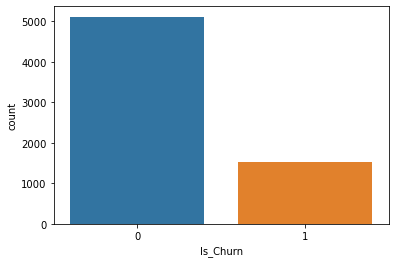

In [102]:
sns.countplot(df['Is_Churn'])

In [103]:
#we have imbalanced dataset
#we have to do sampling
#upsampling positive class
X_no = X[X['Is_Churn']==0]
X_yes = X[X['Is_Churn']==1]

### Upsampling positive class

In [104]:
X_yes_upsampled = X_yes.sample(n=len(X_no),replace=True, random_state=42)

print(len(X_yes_upsampled))

5113


In [105]:
final_df['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

<AxesSubplot:xlabel='Is_Churn', ylabel='count'>

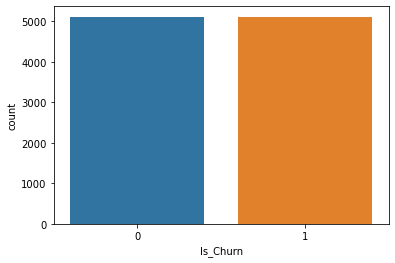

In [106]:
#combining positive and negative class
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

sns.countplot(data=X_upsampled, x='Is_Churn')

In [107]:
X_upsampled.head()

,Balance,Is_Churn,Gender_Male,Transaction_Status_1,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor,Age_group_31 - 41,Age_group_41 - 51,Age_group_51 - 61,Age_group_61 - 71,Age_group_71 - 81
0,875572.11,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,701607.06,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0
2,111026.79,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,1072102.23,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,770796.81,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report

In [109]:
X = X_upsampled.drop('Is_Churn',axis=1)
y = X_upsampled['Is_Churn']

In [110]:
X.head()

,Balance,Gender_Male,Transaction_Status_1,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor,Age_group_31 - 41,Age_group_41 - 51,Age_group_51 - 61,Age_group_61 - 71,Age_group_71 - 81
0,875572.11,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,701607.06,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0
2,111026.79,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,1072102.23,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,770796.81,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


In [175]:
scaler = StandardScaler()
X['Balance'] = scaler.fit_transform(X[['Balance']])

In [176]:
X.head()

,Balance,Gender_Male,Transaction_Status_1,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor,Age_group_31 - 41,Age_group_41 - 51,Age_group_51 - 61,Age_group_61 - 71,Age_group_71 - 81
0,0.098186,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,-0.237862,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0
2,-1.378687,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,0.477823,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,-0.104208,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


<AxesSubplot:xlabel='Balance', ylabel='Density'>

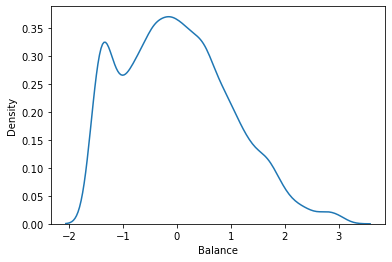

In [177]:
#plotting the balance variable
sns.kdeplot(X['Balance'])

### splitting the model

In [122]:
from sklearn.model_selection import train_test_split

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X,y,test_size=0.2,random_state=21)

In [123]:
print(x_train_new.shape,y_train_new.shape)

(8180, 17) (8180,)


In [124]:
print(x_test_new.shape,y_test_new.shape)

(2046, 17) (2046,)


## RidgeClassifier

In [126]:
#from training data only
clf_ridge = RidgeClassifier()
clf_ridge.fit(x_train_new,y_train_new)

test_predict = clf_ridge.predict(x_test_new)
train_predict = clf_ridge.predict(x_train_new)
print("testing classification report:\n",classification_report(y_test_new,test_predict))
print("training classification report:\n",classification_report(y_train_new,train_predict))

testing classification report:
               precision    recall  f1-score   support

           0       0.59      0.58      0.59      1016
           1       0.60      0.61      0.60      1030

    accuracy                           0.60      2046
   macro avg       0.60      0.60      0.60      2046
weighted avg       0.60      0.60      0.60      2046

training classification report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61      4097
           1       0.61      0.61      0.61      4083

    accuracy                           0.61      8180
   macro avg       0.61      0.61      0.61      8180
weighted avg       0.61      0.61      0.61      8180



### tuning ridge classifier

In [131]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

param_grid={'alpha':np.linspace(0.1,1.0,20)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
grid_search = GridSearchCV(estimator=clf_ridge, param_grid=param_grid, cv=cv, n_jobs=1, scoring='f1')
grid_result = grid_search.fit(x_train_new,y_train_new)
# print(grid_result.)

In [132]:
grid_result.best_params_

{'alpha': 0.1}

In [133]:
#working with tuned params
#from training data only
clf_ridge = RidgeClassifier(alpha=0.1)
clf_ridge.fit(x_train_new,y_train_new)

test_predict = clf_ridge.predict(x_test_new)
train_predict = clf_ridge.predict(x_train_new)
print("testing classification report:\n",classification_report(y_test_new,test_predict))
print("training classification report:\n",classification_report(y_train_new,train_predict))

testing classification report:
               precision    recall  f1-score   support

           0       0.59      0.58      0.59      1016
           1       0.60      0.61      0.60      1030

    accuracy                           0.60      2046
   macro avg       0.60      0.60      0.60      2046
weighted avg       0.60      0.60      0.60      2046

training classification report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61      4097
           1       0.61      0.61      0.61      4083

    accuracy                           0.61      8180
   macro avg       0.61      0.61      0.61      8180
weighted avg       0.61      0.61      0.61      8180



## RandomForestClassifier

In [135]:
#from training data created train and test
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train_new,y_train_new)

test_rfc_pred = rfc.predict(x_test_new)
train_rfc_pred = rfc.predict(x_train_new)
print("testing score:\n",classification_report(y_test_new,test_rfc_pred))
print("training score:\n",classification_report(y_train_new,train_rfc_pred))

testing score:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      1016
           1       0.82      0.95      0.88      1030

    accuracy                           0.87      2046
   macro avg       0.88      0.87      0.87      2046
weighted avg       0.88      0.87      0.87      2046

training score:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4097
           1       1.00      1.00      1.00      4083

    accuracy                           1.00      8180
   macro avg       1.00      1.00      1.00      8180
weighted avg       1.00      1.00      1.00      8180



### GridSearchCV on RandomForest

In [143]:
param_grid=[
    {
        'n_estimators':[100,120,150,180],
        'max_features': [0.2,0.6,1.0],
        'max_depth':[2,8,None],
        'max_samples':[0.5,0.75,1.0]
    }
]

In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(rfc1, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1,scoring='f1')

In [145]:
best_clf = clf.fit(x_train_new,y_train_new)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.0min finished


In [146]:
best_clf.best_estimator_
best_clf.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.75,
 'n_estimators': 180}

In [147]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.2min finished


In [148]:
best_clf.best_estimator_
best_clf.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.75,
 'n_estimators': 100}

In [151]:
#from splitted data
rfc1=RandomForestClassifier(max_features=0.6,max_samples=0.75,n_estimators=100)
rfc1.fit(x_train_new,y_train_new)

rfc_train_pred=rfc1.predict(x_train_new)
rfc_pred_whole = rfc1.predict(x_test_new)
print("testing score:\n",classification_report(y_test_new,rfc_pred_whole))
print("training score:\n",classification_report(y_train_new,rfc_train_pred))

testing score:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      1016
           1       0.82      0.95      0.88      1030

    accuracy                           0.87      2046
   macro avg       0.88      0.87      0.87      2046
weighted avg       0.88      0.87      0.87      2046

training score:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4097
           1       1.00      1.00      1.00      4083

    accuracy                           1.00      8180
   macro avg       1.00      1.00      1.00      8180
weighted avg       1.00      1.00      1.00      8180



In [195]:
#from whole training data only
rfc1=RandomForestClassifier(max_features=0.6,max_samples=0.75,n_estimators=100)
rfc1.fit(X,y)

rfc_pred = rfc1.predict(X)
print("training score:\n",classification_report(y,rfc_pred))

training score:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5113
           1       1.00      1.00      1.00      5113

    accuracy                           1.00     10226
   macro avg       1.00      1.00      1.00     10226
weighted avg       1.00      1.00      1.00     10226



In [153]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y,rfc_pred))

[[5098   15]
 [  12 5101]]


### Loading test data

In [154]:
test_data=pd.read_csv("test_lTY72QC.csv")

In [155]:
test_data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [156]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 10) for i in range(21, 72, 10)]
print(labels)

#cut function create group or segment the data on bins
test_data['Age_group'] = pd.cut(test_data.Age, range(21, 90, 10), right=False, labels=labels)

['21 - 31', '31 - 41', '41 - 51', '51 - 61', '61 - 71', '71 - 81']


In [157]:
#let's drop all the exclude variables
test=test_data.drop(['ID','Age','Income','Credit_Card'],axis=1)
test.head()

,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Category,Age_group
0,Female,1008636.39,2,1,2,Average,41 - 51
1,Male,341460.72,2,0,2,Average,31 - 41
2,Female,439460.10,0,0,2,Good,21 - 31
3,Male,28581.93,0,1,2,Poor,41 - 51
4,Male,1104540.03,2,1,3+,Good,41 - 51


In [158]:
cat_features = ['Gender','Transaction_Status','Vintage','Product_Holdings','Credit_Category','Age_group']
test=pd.get_dummies(test,columns=cat_features,drop_first=True)

In [159]:
test.shape

(2851, 17)

In [164]:
X.shape

(10226, 17)

In [165]:
test.columns

Index(['Balance', 'Gender_Male', 'Transaction_Status_1', 'Vintage_1',
       'Vintage_2', 'Vintage_3', 'Vintage_4', 'Vintage_5',
       'Product_Holdings_2', 'Product_Holdings_3+', 'Credit_Category_Good',
       'Credit_Category_Poor', 'Age_group_31 - 41', 'Age_group_41 - 51',
       'Age_group_51 - 61', 'Age_group_61 - 71', 'Age_group_71 - 81'],
      dtype='object')

In [166]:
X.columns

Index(['Balance', 'Gender_Male', 'Transaction_Status_1', 'Vintage_1',
       'Vintage_2', 'Vintage_3', 'Vintage_4', 'Vintage_5',
       'Product_Holdings_2', 'Product_Holdings_3+', 'Credit_Category_Good',
       'Credit_Category_Poor', 'Age_group_31 - 41', 'Age_group_41 - 51',
       'Age_group_51 - 61', 'Age_group_61 - 71', 'Age_group_71 - 81'],
      dtype='object')

In [184]:
#creating the scaler
mean = np.mean(test['Balance'])
std = np.std(test['Balance'])
def scaling_test(x):
    scaled = (x-mean)/std
    return scaled

In [188]:
test['Balance']=test['Balance'].apply(scaling_test, lambda x: x)

In [190]:
test.drop('new_balance',axis=1,inplace=True)

In [191]:
test.head()

,Balance,Gender_Male,Transaction_Status_1,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor,Age_group_31 - 41,Age_group_41 - 51,Age_group_51 - 61,Age_group_61 - 71,Age_group_71 - 81
0,0.378469,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,-0.892080,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,-0.705453,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,-1.487916,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
4,0.561105,1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0


### Creating Final prediction

### RandomForest

In [198]:
rfc1.fit(X,y)
rfc_pred = rfc1.predict(test)
prediction=pd.DataFrame(np.c_[test_data['ID'],rfc_pred], columns=['ID','Is_Churn'])

In [199]:
prediction.to_csv("churn_prediction_rfc.csv",index=False)

## RidgeClassifier

In [200]:
clf_ridge = RidgeClassifier(alpha=0.1)
clf_ridge.fit(X,y)

predict = clf_ridge.predict(test)


In [201]:
prediction1=pd.DataFrame(np.c_[test_data['ID'],predict], columns=['ID','Is_Churn'])

In [202]:
prediction1.to_csv("churn_prediction_ridge.csv",index=False)

## Logistic Regression

In [203]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

log_pred = log_reg.predict(test)

### GridSearchCV on logistic

In [204]:
param_grid=[
    {
        'penalty':['l1','l2','elasticnet',None],
        'C': np.logspace(-4,4,20),
        'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
        'max_iter':[100,1000,2500,5000]
    }
]

In [205]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(log_reg, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

In [208]:
best_clf = clf.fit(x_train_new,y_train_new)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 3148 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  1.0min finished


In [209]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

In [210]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 4440 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  1.1min finished


In [211]:
best_clf.best_estimator_

LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')

In [212]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')
log_reg.fit(X_train,y_train)

log_pred = log_reg.predict(test)
# accuracy_score(y_train,rfc_pred)

In [213]:
prediction2=pd.DataFrame(np.c_[test_data['ID'],log_pred], columns=['ID','Is_Churn'])

In [214]:
prediction2.to_csv("churn_prediction_logistic_gridsearch.csv",index=False)